# Perceptron classifier

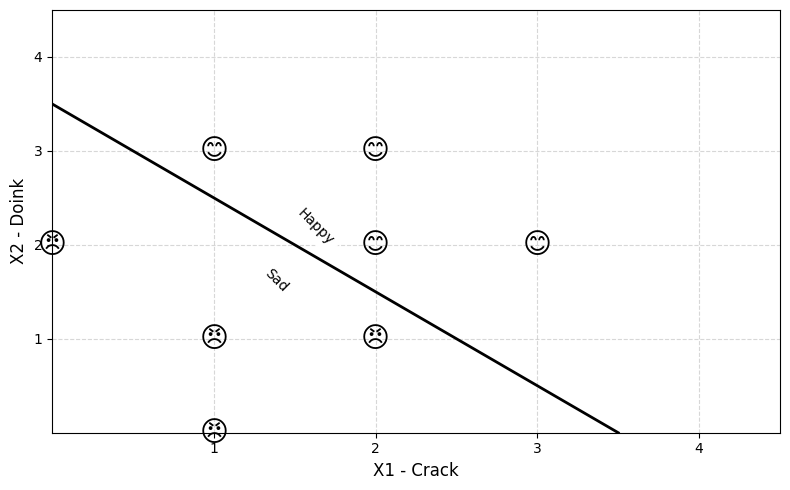

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sympy import symbols, Eq, solve


alien_language = pd.DataFrame({
    'Sentence': ['Crack!', 'Doink doink!', 'Crack doink!', 'Crack doink crack!', 'Doink crack doink doink!', 'Crack doink doink crack!', 'Doink doink crack crack crack!', 'Crack doink doink crack doink!'],
    'Crack': [1, 0, 1, 2, 1, 2, 3, 2], 
    'Doink': [0, 2, 1, 1, 3, 2, 2, 3],
})

x1_val, x2_val = symbols('x1 x2')
f = x1_val + x2_val - 3.5


fig, ax = plt.subplots(figsize=(8, 5))
for x, y in alien_language[['Crack', 'Doink']].values:
    if f.subs({x1_val: x, x2_val: y}) >= 0:
        plt.text(x, y, "😊", fontsize=20, ha='center', va='center')
    else:
        plt.text(x, y, "😠", fontsize=20, ha='center', va='center')


# Dibujar línea divisoria
x_vals = [0, 3.5]
y_vals = [3.5, 0]
plt.plot(x_vals, y_vals, 'k-', linewidth=2)  # línea negra

# Texto en la línea
plt.text(1.5, 2.0, 'Happy', rotation=-45, fontsize=10, backgroundcolor='white')
plt.text(1.3, 1.5, 'Sad', rotation=-45, fontsize=10, backgroundcolor='white')

# Configurar ejes
plt.xlim(0, 4.5)
plt.ylim(0, 4.5)

plt.xlabel('X1 - Crack', fontsize=12)
plt.ylabel('X2 - Doink', fontsize=12)


# Remover los ticks de los ejes
ax.set_xticks([1, 2, 3, 4])
ax.set_yticks([1, 2, 3, 4])

# Mostrar cuadrícula
plt.grid(True, linestyle='--', alpha=0.5)

# Mostrar gráfico
plt.tight_layout()
plt.show()


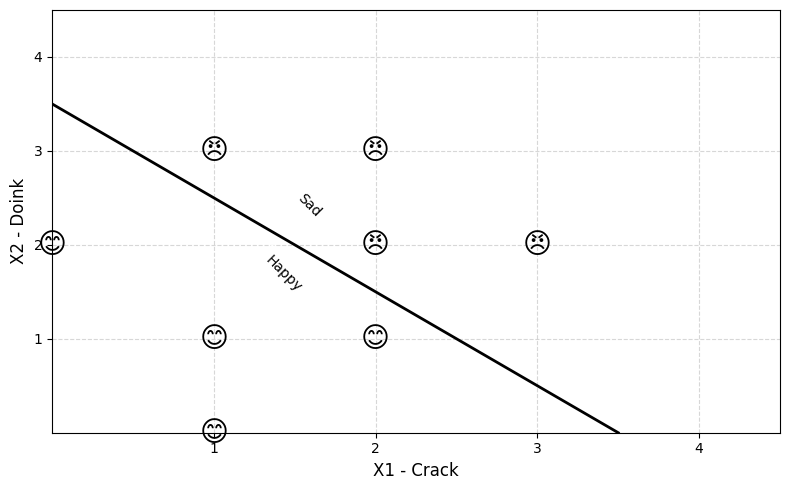

In [ ]:
# Inverted 

import pandas as pd
import matplotlib.pyplot as plt
from sympy import symbols, Eq, solve


alien_language = pd.DataFrame({
    'Sentence': ['Crack!', 'Doink doink!', 'Crack doink!', 'Crack doink crack!', 'Doink crack doink doink!', 'Crack doink doink crack!', 'Doink doink crack crack crack!', 'Crack doink doink crack doink!'],
    'Crack': [1, 0, 1, 2, 1, 2, 3, 2], 
    'Doink': [0, 2, 1, 1, 3, 2, 2, 3],
})

x1_val, x2_val = symbols('x1 x2')
f = - x1_val - x2_val + 3.5


fig, ax = plt.subplots(figsize=(8, 5))
for x, y in alien_language[['Crack', 'Doink']].values:
    if f.subs({x1_val: x, x2_val: y}) >= 0:
        plt.text(x, y, "😊", fontsize=20, ha='center', va='center')
    else:
        plt.text(x, y, "😠", fontsize=20, ha='center', va='center')


# Dibujar línea divisoria
x_vals = [0, 3.5]
y_vals = [3.5, 0]
plt.plot(x_vals, y_vals, 'k-', linewidth=2)  # línea negra

# Texto en la línea
plt.text(1.5, 2.3, 'Sad', rotation=-45, fontsize=10, backgroundcolor='white')
plt.text(1.3, 1.5, 'Happy', rotation=-45, fontsize=10, backgroundcolor='white')

# Configurar ejes
plt.xlim(0, 4.5)
plt.ylim(0, 4.5)

plt.xlabel('X1 - Crack', fontsize=12)
plt.ylabel('X2 - Doink', fontsize=12)


# Remover los ticks de los ejes
ax.set_xticks([1, 2, 3, 4])
ax.set_yticks([1, 2, 3, 4])

# Mostrar cuadrícula
plt.grid(True, linestyle='--', alpha=0.5)

# Mostrar gráfico
plt.tight_layout()
plt.show()

## Mean Perceptron Error



In [ ]:
import pandas as pd
from sympy import symbols


alien_language = pd.DataFrame({
    'Crack': [1, 0, 1, 3],  
    'Doink': [0, 1, 3, 2],
    'Target': [0, 1, 1, 0]
})

x1, x2 = symbols('x1 x2')

score_func1 = x1 + (2 * x2) - 4
score_func2 = -x1 + x2

def step_func(y_pred):
    return 1 if y_pred >= 0 else 0

def error_func(y, y_pred, score):
    return 0 if y_pred == y else abs(score)

data = []

for x1_val, x2_val, y in alien_language[['Crack', 'Doink', 'Target']].values:
    score1 = score_func1.subs({x1: x1_val, x2: x2_val})
    score2 = score_func2.subs({x1: x1_val, x2: x2_val})
    pred1 = step_func(score1)
    pred2 = step_func(score2)
    error1 = error_func(y, pred1, score1)
    error2 = error_func(y, pred2, score2)
    data.append({
        'X1': x1_val,
        'X2': x2_val,
        'Target': y,
        'Predict1': pred1,
        'Predict2': pred2,
        'Score1': score1,
        'Score2': score2,
        'Error1': error1,
        'Error2': error2
    })

results_df = pd.DataFrame(data)
print(f"Mean Perceptron Error for Score1: {results_df['Error1'].mean()}")
print(f"Mean Perceptron Error for Score2: {results_df['Error2'].mean()}")
results_df

Mean Error for Score1: 1.25
Mean Error for Score2: 0.0


,X1,X2,Target,Predict1,Predict2,Score1,Score2,Error1,Error2
0,1,0,0,0,0,-3,-1,0,0
1,0,1,1,0,1,-2,1,2,0
2,1,3,1,1,1,3,2,0,0
3,3,2,0,1,0,3,-1,3,0


## Perceptron algorithm

The process is called the perceptron algorithm, and it consists of starting with a random perceptron classifier and slowly improving it until we have a good one. The main steps of the perceptron algorithm follow:

Start with a random perceptron classifier.
Slightly improve the classifier. (Repeat many times).
Measure the perceptron error to decide when to stop running the loop.

We start by developing the step inside the loop, a technique used to slightly improve a perceptron classifier called the perceptron trick. It is similar to the square and absolute tricks we learned in the sections “The square trick” and “The absolute trick”.

Instead of subtracting the learning rate from each weight, we subtracted the learning rate times the number of appearances of the word in the sentence. The true reason for this is calculus. In other words, when we develop the gradient descent method, the derivative of the error function forces us to do this. This process is detailed in appendix B, section “Using gradient descent to train classification models.”

Pseudocode for the perceptron trick

Inputs:

A perceptron with weights a, b, and bias c
A point with coordinates (x1, x2) and label y
A small positive value η (the learning rate)
Output:

A perceptron with new weights a', b', and bias c'
Procedure:

The prediction the perceptron makes at the point is ŷ = step(ax1 + bx2 + c).
Case 1: If ŷ = y:
Return the original perceptron with weights a', b', and bias c'.
Case 2: If ŷ = 1 and y = 0:
Return the perceptron with the following weights and bias:
a' = a – ηx1
b' = b – ηx2
c' = c – ηx1
Case 3: If ŷ = 0 and y = 1:
Return the perceptron with the following weights and bias:
a' = a + ηx1
b' = b – ηx2
c' = c + ηx1

In [5]:
# Utils

import numpy as np
import matplotlib
from matplotlib import pyplot

def draw_line(slope, y_intercept, color='grey', linewidth=0.7, starting=0, ending=8):
    x = np.linspace(starting, ending, 1000)
    pyplot.plot(x, y_intercept + slope*x, linestyle='-', color=color, linewidth=linewidth)

def plot_points(features, labels):
    X = np.array(features)
    y = np.array(labels)
    pyplot.scatter(X, y)
    pyplot.xlabel('number of rooms')
    pyplot.ylabel('prices')

In [16]:
def perceptron_trick(a, b, c, x1, x2, y, learning_rate):
    
    y_predict = 1 if (a * x1 + b * x2 - c) >= 0 else 0

    a_predict = a
    b_predict = b
    c_predict = c

    if y_predict == 1 and y == 0:
        a_predict = a - learning_rate * x1
        b_predict = b - learning_rate * x2
        c_predict = c - learning_rate
    elif y_predict == 0 and y == 1:
        a_predict = a + learning_rate * x1
        b_predict = b + learning_rate * x2
        c_predict = c + learning_rate

    return a_predict, b_predict, c_predict

Final weights: a=0.8344218515250481, b=0.7479544029403025, c=0.410571580830845


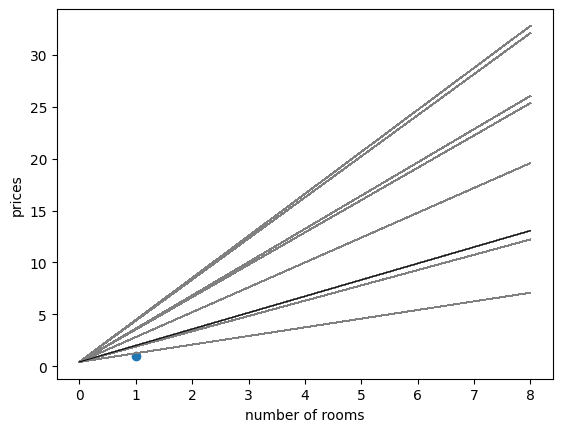

In [17]:
import random
import re

random.seed(0)

def perceptron(features, labels, learning_rate=0.01, epochs = 1000):
    a = random.random()
    b = random.random()
    c = random.random()

    c_predict = 0
    m_predict = 0
    
    

    for epoch in range(epochs):
        i = random.randint(0, len(features)-1)
        x1 = features[i][0]
        x2 = features[i][1]
        y = labels[i]
        
        a_predict, b_predict, c_predict = perceptron_trick(a, b, c, x1, x2, y, learning_rate=learning_rate)
        m_predict = a_predict * x1 + b_predict * x2
        
        # Uncomment any of the following lines to plot different epochs
        #if epoch == 1:
        #if epoch <= 10:
        #if epoch <= 50:
        #if epoch > 50:
        if True:
            draw_line(m_predict, c_predict, starting=0, ending=8)

    draw_line(m_predict, c_predict, 'black', starting=0, ending=8)
    plot_points(x1, x2)
    
    return  a_predict, b_predict, c_predict

alien_language = pd.DataFrame({
    'Sentence': ['Crack!', 'Doink doink!', 'Crack doink!', 'Crack doink crack!', 'Doink crack doink doink!', 'Crack doink doink crack!', 'Doink doink crack crack crack!', 'Crack doink doink crack doink!'],
    'Crack': [1, 0, 1, 2, 1, 2, 3, 2], 
    'Doink': [0, 2, 1, 1, 3, 2, 2, 3],
})



def count_word(sentence, word):
    return len(re.findall(rf'\b{word}\b', sentence.lower()))

data = pd.DataFrame({
    'x1': alien_language['Sentence'].apply(lambda s: count_word(s, 'crack')),
    'x2': alien_language['Sentence'].apply(lambda s: count_word(s, 'doink')),
    'y': [0, 0, 0, 0, 1, 1, 1, 1]
})



features = data[['x1', 'x2']].values
labels = data['y'].values


a, b, c = perceptron(features, labels, learning_rate=0.01, epochs=1000)
print(f"Final weights: a={a}, b={b}, c={c}")